# Libraries

In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet

In [4]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

In [2]:
pwd

'/Users/ricardo/Documents/GitHub/Hospitals-Access-Peru/code'

### Reading, handling and processing IPRESS.csv

In [5]:
base = open('../data/IPRESS.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'MacRoman'

In [6]:
csv_data = pd.read_csv('../data/IPRESS.csv', encoding=charenc)


In [7]:
csv_data = csv_data[['UBIGEO','InstituciÛn', 'Nombre del establecimiento', 'ClasificaciÛn', 'Departamento', 'Provincia', 'Distrito', 'Estado' ,'NORTE' ,'ESTE']]
csv_data.rename(columns={'InstituciÛn':'INSTITUCIÓN', 'Nombre del establecimiento': 'NOMBRE DEL ESTABLECIMIENTO', 'ClasificaciÛn':'CLASIFICACION', 'Departamento':'DEPARTAMENTO', 'Provincia':'PROVINCIA', 'Distrito':'DISTRITO', 'Estado':'ESTADO' ,'NORTE':'LATITUD' ,'ESTE':'LONGITUD'}, inplace=True)
cleaned_csv = csv_data.loc[csv_data['ESTADO'] == 'ACTIVADO'].dropna(subset=['LATITUD', 'LONGITUD'])
cleaned_csv.head()

,UBIGEO,INSTITUCIÓN,NOMBRE DEL ESTABLECIMIENTO,CLASIFICACION,DEPARTAMENTO,PROVINCIA,DISTRITO,ESTADO,LATITUD,LONGITUD
1,60611,GOBIERNO REGIONAL,AMBATO,PUESTOS DE SALUD O POSTAS DE SALUD,CAJAMARCA,CUTERVO,SANTA CRUZ,ACTIVADO,-78.858380,-6.133523
2,160302,GOBIERNO REGIONAL,SANTA ISABEL DE YUMBATURO,PUESTOS DE SALUD O POSTAS DE SALUD,LORETO,LORETO,PARINARI,ACTIVADO,-74.258139,-4.581509
6,150142,MINSA,PUESTO DE SALUD HEROES DEL CENEPA,PUESTOS DE SALUD O POSTAS DE SALUD,LIMA,LIMA,VILLA EL SALVADOR,ACTIVADO,-76.930608,-12.248699
12,250101,GOBIERNO REGIONAL,NUEVA BETANIA,PUESTOS DE SALUD O POSTAS DE SALUD,UCAYALI,CORONEL PORTILLO,CALLERIA,ACTIVADO,-74.296531,-8.398366
15,220907,GOBIERNO REGIONAL,PONGO ISLA,PUESTOS DE SALUD O POSTAS DE SALUD,SAN MARTIN,SAN MARTIN,HUIMBAYOC,ACTIVADO,-75.885812,-6.438298


In [8]:
cleaned_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7956 entries, 1 to 20818
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UBIGEO                      7956 non-null   int64  
 1   INSTITUCIÓN                 7956 non-null   object 
 2   NOMBRE DEL ESTABLECIMIENTO  7956 non-null   object 
 3   CLASIFICACION               7951 non-null   object 
 4   DEPARTAMENTO                7956 non-null   object 
 5   PROVINCIA                   7956 non-null   object 
 6   DISTRITO                    7956 non-null   object 
 7   ESTADO                      7956 non-null   object 
 8   LATITUD                     7956 non-null   float64
 9   LONGITUD                    7956 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 683.7+ KB


### Distritos Shape file 

In [9]:
pwd

'/Users/ricardo/Documents/GitHub/Hospitals-Access-Peru/code'

In [12]:
maps = gpd.read_file('../data/distritos/DISTRITOS.shp')

In [13]:
maps

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...,...,...,...,...,...,...,...,...,...
1868,10,HUANUCO,1006,LEONCIO PRADO,100608,CASTILLO GRANDE,CASTILLO GRANDE,0001,1,INEI,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,10,HUANUCO,1006,LEONCIO PRADO,100609,PUEBLO NUEVO,PUEBLO NUEVO,0001,1,INEI,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,10,HUANUCO,1006,LEONCIO PRADO,100610,SANTO DOMINGO DE ANDA,PACAE,0001,1,INEI,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,21,PUNO,2111,SAN ROMAN,211105,SAN MIGUEL,SAN MIGUEL,0001,1,INEI,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


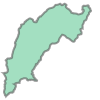

In [14]:
maps['geometry'].iloc[10]